A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to **purchase houses at a price below their actual values and flip them on at a higher price**. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.


### **Goal of the Case Study** 

The goal of this case study is to model the **price of houses** with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

A regression model is built using **regularisation** in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### Steps Followed:
1. Read and analysis of the data
2. Missing value treatment
3. Outlier treatment and columnwise analysis
4. Univariate, Bivariate analysis and Mutlivariate Analysis
5. Data Preparation - creating dummies, Train test split and Rescaling Features
6. Model Build and Evaluation
7. Conclusion - Metrics Table and Co-efficients after regularization
8. Workings on the subjective Questions
9. Summary

## Step1: Read and analysis of the data

In [2]:
# Importing all necessary libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking number of rows and columns
housing.shape

(1460, 81)

In [5]:
# To display all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
# Overiew of the datatypes, missing data and columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step2: Missing values treatment

In [7]:
# Percentage of missing values
round((housing.isnull().sum()/len(housing))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

###### Dropping columns with more than 40% missing values

In [8]:
missing_columns = housing.columns[round((housing.isnull().sum()/len(housing))*100,2) > 40]
housing = housing.drop(missing_columns, axis = 1)

In [9]:
# Checking the percentage of the missing data in the columns
round((housing.isnull().sum()/len(housing))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [10]:
# Also dropping the Id column which is not necessary for the analysis
housing = housing.drop(['Id'], axis = 1)

###### Missing value imputation for columns

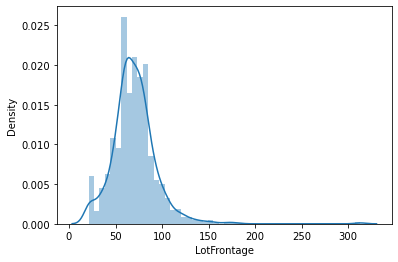

In [11]:
sns.distplot(housing['LotFrontage'])
plt.show()

In [12]:
housing.LotFrontage.median()

69.0

In [13]:
housing.LotFrontage.fillna(69.0,inplace=True) #Impute with median as this column has skewed data

###### Comment: 

There are few columns which I have imputed missing values NA with No Basement, NO garage etc after veiwing information from the data dictionary. These are certainly not missing values and hence imputed with another category

In [14]:
housing.BsmtQual.value_counts(normalize=True)

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

In [15]:
housing.BsmtQual.isna().sum()

37

In [16]:
housing.BsmtQual.fillna('No Basement', inplace=True) # Fill missing values with No basement for this column

In [17]:
housing.BsmtCond.isna().sum()

37

In [18]:
housing.BsmtCond.value_counts(normalize=True)

TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64

###### Comment: 
About 92% of this column is Typical/Average. Highly skewed. Hence will drop this column

In [19]:
housing.drop('BsmtCond', axis = 1, inplace=True)

In [20]:
housing.BsmtExposure.value_counts(normalize = True)

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

In [21]:
housing.BsmtExposure.isna().sum()

38

In [22]:
housing.BsmtExposure.fillna('No Basement', inplace=True) # Fill missing values with No basement for this column

In [23]:
housing.BsmtFinType1.value_counts(normalize = True)

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

In [24]:
housing.BsmtFinType1.isna().sum()

37

In [25]:
housing.BsmtFinType1.fillna('No Basement', inplace=True) # Fill missing values with No basement for this column

In [26]:
housing.BsmtFinType2.value_counts(normalize=True)

Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64

###### Comment:
88% of this column is unfinished. Highly skewed. Hence we will drop the column

In [27]:
housing.drop('BsmtFinType2', inplace=True, axis = 1)

In [28]:
housing.GarageType.value_counts(normalize = True)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

In [29]:
housing.GarageType.isna().sum()

81

In [30]:
housing.GarageType.fillna('No Garage', inplace=True) # Fill missing values with No Garage for this column

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

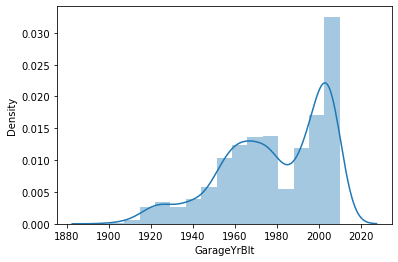

In [31]:
sns.distplot(housing.GarageYrBlt)

In [32]:
housing.GarageYrBlt.median()

1980.0

In [33]:
housing.GarageYrBlt.fillna(1980.0, inplace=True) #Impute with median as this column has skewed data

In [34]:
housing.GarageFinish.value_counts(normalize = True)

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64

In [35]:
housing.GarageFinish.fillna('No Garage', inplace=True)  # Fill missing values with No Garage for this column

In [36]:
housing.GarageQual.value_counts(normalize = True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Po    0.002175
Ex    0.002175
Name: GarageQual, dtype: float64

###### Comment:
About 95% is typical/average for this column. Highly skewed. Hence will drop the column

In [37]:
housing.drop('GarageQual', axis = 1, inplace=True)

In [38]:
housing.GarageCond.value_counts(normalize = True)    

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64

###### Comment:
About 96% is typical/average for this column. Highly skewed. Hence will drop the column

In [39]:
housing.drop('GarageCond', axis = 1, inplace=True)

###### Dropping rows of the below columns which has less than 1% missing data

In [40]:
housing = housing[~housing.MasVnrType.isna()]

In [41]:
housing = housing[~housing.MasVnrArea.isna()]

In [42]:
housing = housing[~housing.Electrical.isna()]

In [43]:
round((housing.isnull().sum()/len(housing))*100,2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr 

###### Comment:
All null values have been taken care of.

## Step 3: Outlier treatment and column wise analysis

#### Numerical Variables

In [44]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,69.845624,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.445210,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,42.350366,22.044429,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,23.989371,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14375.000000,8.000000,7.000000,2006.000000,2006.000000,335.00000,1064.000000,119.000000,1232.000000,1602.000000,1680.000000,954.000000,0.000000,2158.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17308.500000,8.000000,8.000000,2007.000000,2007.000000,456.00000,1272.000000,398.000000,1468.000000,1749.000000,1827.000000,1141.500000,0.000000,2464.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,849.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,325812.000000
99%,190.000000,137.500000,37802.000000,10.000000,9.000000,2009.000000,2009.000000,792.00000,1572.500000,832.000000,179

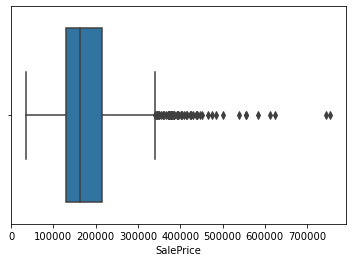

In [45]:
sns.boxplot(housing['SalePrice']);

###### Comment:
The Price column does have outliers, since its the target variable, we will perform log transformation on this variable later. We do not want to loose the extreme values in this case

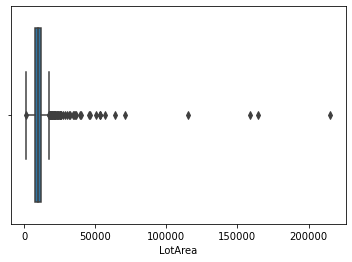

In [46]:
sns.boxplot(housing['LotArea']);

In [47]:
# Chking the percentile of the LotArea column
housing.LotArea.describe(percentiles=[.25,.5,.75,.90,.95,.99])

count      1451.000000
mean      10507.808408
std        9992.987081
min        1300.000000
25%        7537.500000
50%        9477.000000
75%       11600.000000
90%       14375.000000
95%       17308.500000
99%       37802.000000
max      215245.000000
Name: LotArea, dtype: float64

In [48]:
#removing records beyond 99 percentile
housing = housing[housing['LotArea'] <= 37802.000000]

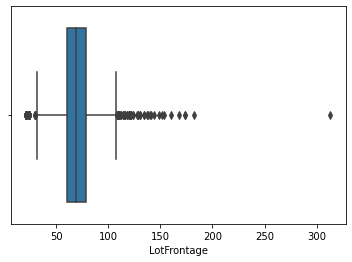

In [49]:
sns.boxplot(housing['LotFrontage']);

In [50]:
housing.LotFrontage.quantile((0.99,1))

0.99    134.0
1.00    313.0
Name: LotFrontage, dtype: float64

In [51]:
#removing records beyond 99 percentile
housing = housing[housing.LotFrontage < 313.0]

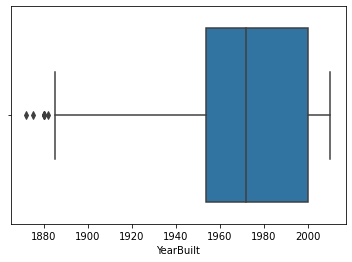

In [52]:
sns.boxplot(housing['YearBuilt']);

In [53]:
housing = housing[housing['YearBuilt'] > 1880]

###### Comment:
Considering all the data beyond the year 1880. There are only 4 values below 1880 so dropping them

In [54]:
housing['MiscVal'].value_counts(normalize = True)

0        0.965010
400      0.007698
500      0.004899
700      0.002799
450      0.002799
2000     0.002799
600      0.002799
1200     0.001400
480      0.001400
1150     0.000700
800      0.000700
15500    0.000700
620      0.000700
3500     0.000700
560      0.000700
2500     0.000700
1300     0.000700
1400     0.000700
350      0.000700
8300     0.000700
54       0.000700
Name: MiscVal, dtype: float64

In [55]:
# Misc Val has 96% values for 0. This is highly skewed. We will drop this column
housing.drop('MiscVal', axis = 1, inplace=True)

In [56]:
housing['3SsnPorch'].value_counts(normalize = True)

0      0.983205
168    0.002099
216    0.001400
144    0.001400
180    0.001400
245    0.000700
238    0.000700
290    0.000700
196    0.000700
182    0.000700
407    0.000700
304    0.000700
162    0.000700
153    0.000700
320    0.000700
140    0.000700
130    0.000700
96     0.000700
23     0.000700
508    0.000700
Name: 3SsnPorch, dtype: float64

In [57]:
# 3SsnPorch Val has 98% values for 0. This is highly skewed. We will drop this column
housing.drop('3SsnPorch', axis = 1, inplace=True)

In [58]:
housing['ScreenPorch'].value_counts(normalize = True)

0      0.920224
192    0.004199
224    0.003499
120    0.003499
189    0.002799
180    0.002799
160    0.002099
126    0.002099
168    0.002099
147    0.002099
144    0.002099
90     0.002099
176    0.001400
184    0.001400
142    0.001400
198    0.001400
200    0.001400
216    0.001400
170    0.001400
259    0.001400
288    0.001400
100    0.001400
116    0.000700
145    0.000700
156    0.000700
40     0.000700
155    0.000700
154    0.000700
153    0.000700
152    0.000700
53     0.000700
60     0.000700
143    0.000700
63     0.000700
119    0.000700
80     0.000700
95     0.000700
99     0.000700
140    0.000700
161    0.000700
128    0.000700
122    0.000700
410    0.000700
130    0.000700
322    0.000700
163    0.000700
225    0.000700
291    0.000700
287    0.000700
276    0.000700
273    0.000700
271    0.000700
266    0.000700
265    0.000700
263    0.000700
260    0.000700
252    0.000700
234    0.000700
233    0.000700
374    0.000700
165    0.000700
222    0.000700
220    0

In [59]:
# ScreenPorch Val has 92% values for 0. This is highly skewed. We will drop this column
housing.drop('ScreenPorch', axis = 1, inplace=True)

In [60]:
housing['PoolArea'].value_counts(normalize = True)

0      0.995801
738    0.000700
648    0.000700
576    0.000700
555    0.000700
519    0.000700
512    0.000700
Name: PoolArea, dtype: float64

In [61]:
# PoolArea Val has 99% values for 0. This is highly skewed. We will drop this column
housing.drop('PoolArea', axis = 1, inplace=True)

In [62]:
housing['LowQualFinSF'].value_counts(normalize = True)

0      0.982505
80     0.002099
360    0.001400
384    0.000700
53     0.000700
120    0.000700
144    0.000700
156    0.000700
232    0.000700
234    0.000700
371    0.000700
572    0.000700
528    0.000700
392    0.000700
397    0.000700
420    0.000700
473    0.000700
479    0.000700
481    0.000700
513    0.000700
514    0.000700
515    0.000700
390    0.000700
Name: LowQualFinSF, dtype: float64

In [63]:
# PoolArea Val has 98% values for 0. This is highly skewed. We will drop this column
housing.drop('LowQualFinSF', axis = 1, inplace=True)

In [64]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000
mean,57.001400,69.456263,9748.918125,6.082575,5.573128,1971.480056,1984.66690,102.896431,434.450665,45.778866,567.843247,1048.072778,1153.085374,342.341498,1501.254724,0.417775,0.058083,1.558432,0.382085,2.863541,1.046886,6.495451,0.601819,1978.574528,1.760672,470.997201,92.340098,46.023093,21.643107,6.311407,2007.813856,179534.564731
std,42.429922,20.038837,4178.531253,1.375622,1.109422,29.691866,20.67691,179.183658,428.792450,159.150780,442.660135,412.767250,368.488307,431.877487,502.584305,0.512852,0.239893,0.545141,0.503059,0.808910,0.221180,1.608630,0.634244,23.944545,0.744800,211.815356,121.623802,65.206837,60.203692,2.697185,1.331183,78355.488421
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1882.000000,1950.00000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.00000,0.000000,0.000000,0.000000,223.000000,795.000000,880.000000,0.000000,1125.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,326.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9405.000000,6.000000,5.000000,1973.000000,1993.00000,0.000000,380.000000,0.000000,480.000000,990.000000,1080.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,6.000000,2008.000000,161750.000000
75%,70.000000,79.000000,11457.000000,7.000000,6.000000,2000.000000,2004.00000,166.000000,702.000000,0.000000,808.000000,1281.000000,1381.000000,728.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,212000.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2010.000000,2010.00000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


###### Comment: 
After capping data at quantiles/percentiles, we can see that major outliers have been dropped from the dataframe

###  Converting the below columns into number of years

In [65]:
housing['GarageYrBlt'] = 2021 - housing['GarageYrBlt']
housing['YrSold'] = 2021 - housing['YrSold']
housing['YearRemodAdd'] = 2021 - housing['YearRemodAdd']
housing['Age of the properties'] = 2021 - housing['YearBuilt']

In [66]:
# Dropping YearBuilt column as it has been replaced with Age of the properties
housing = housing.drop(['YearBuilt'], axis = 1)

#### Categorical Variables

In [67]:
housing.MSZoning.value_counts(normalize=True)

RL         0.789363
RM         0.149055
FV         0.043387
RH         0.011197
C (all)    0.006998
Name: MSZoning, dtype: float64

In [68]:
# Replacing the values less than 5% with 'Others'
housing.MSZoning = housing.MSZoning.replace(['RH','C (all)', 'FV'],'Others')

In [69]:
housing.Street.value_counts(normalize=True)

Pave    0.996501
Grvl    0.003499
Name: Street, dtype: float64

In [70]:
# Street-Paved has 99% values. This is highly skewed. We will drop this column
housing.drop('Street', axis = 1, inplace=True)

In [71]:
housing.LotShape.value_counts(normalize=True)

Reg    0.638908
IR1    0.331700
IR2    0.023793
IR3    0.005598
Name: LotShape, dtype: float64

In [72]:
# Replacing the values less than 5% with 'Others'
housing.LotShape = housing.LotShape.replace(['IR2','IR3'],'Others')

In [73]:
housing.LandContour.value_counts(normalize=True)

Lvl    0.906228
Bnk    0.041288
HLS    0.032890
Low    0.019594
Name: LandContour, dtype: float64

In [74]:
# LandContour-Near Flat/Level has 90% values. This is highly skewed. We will drop this column
housing.drop('LandContour', axis = 1, inplace=True)

In [75]:
housing.Utilities.value_counts(normalize=True)

AllPub    0.9993
NoSeWa    0.0007
Name: Utilities, dtype: float64

In [76]:
# Utilities- AllPub has 99% values. This is highly skewed. We will drop this column
housing.drop('Utilities', axis = 1, inplace=True)

In [77]:
housing.LotConfig.value_counts(normalize=True)

Inside     0.723583
Corner     0.179846
CulDSac    0.060882
FR2        0.032890
FR3        0.002799
Name: LotConfig, dtype: float64

In [78]:
# Replacing the values less than 5% with 'Others'
housing.LotConfig = housing.LotConfig.replace(['FR2','FR3'],'Others')

In [79]:
housing.LandSlope.value_counts(normalize=True)

Gtl    0.953114
Mod    0.041987
Sev    0.004899
Name: LandSlope, dtype: float64

In [80]:
# LandSlope- Gtl has 95% values. This is highly skewed. We will drop this column
housing.drop('LandSlope', axis = 1, inplace=True)

In [81]:
housing.Neighborhood.value_counts()

NAmes      224
CollgCr    149
OldTown    108
Edwards     98
Somerst     83
Gilbert     78
NridgHt     76
NWAmes      73
Sawyer      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     40
IDOTRR      37
Timber      34
SWISU       25
StoneBr     24
ClearCr     21
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [82]:
# Replacing the values less than 20 with 'Others'
housing.Neighborhood = housing.Neighborhood.replace(['Blmngtn','MeadowV','BrDale','Veenker','NPkVill','Blueste'],'Others')

In [83]:
housing.Condition1.value_counts()

Norm      1235
Feedr       78
Artery      47
RRAn        26
PosN        18
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [84]:
# Replacing the values less than 20 with 'Others'
housing.Condition1 = housing.Condition1.replace(['PosA','RRNn','RRNe','RRAe','PosN'],'Others')

In [85]:
housing.Condition1.value_counts()

Norm      1235
Feedr       78
Artery      47
Others      43
RRAn        26
Name: Condition1, dtype: int64

In [86]:
housing.Condition2.value_counts(normalize=True)

Norm      0.990203
Feedr     0.004199
Artery    0.001400
RRNn      0.001400
PosN      0.000700
RRAe      0.000700
RRAn      0.000700
PosA      0.000700
Name: Condition2, dtype: float64

In [87]:
# Condition2 -Norm 99% values. This is highly skewed. We will drop this column
housing.drop('Condition2', axis = 1, inplace=True)

In [88]:
housing.BldgType.value_counts(normalize=True)

1Fam      0.833450
TwnhsE    0.079076
Duplex    0.036389
Twnhs     0.030091
2fmCon    0.020994
Name: BldgType, dtype: float64

In [89]:
# Replacing the values less than 5% with 'Others'
housing.BldgType = housing.BldgType.replace(['Duplex','Twnhs','2fmCon'],'Others')

In [90]:
housing.HouseStyle.value_counts(normalize=True)

1Story    0.498950
2Story    0.303009
1.5Fin    0.104969
SLvl      0.044787
SFoyer    0.025892
1.5Unf    0.009797
2.5Unf    0.007698
2.5Fin    0.004899
Name: HouseStyle, dtype: float64

In [91]:
# Replacing the values less than 5% with 'Others'
housing.HouseStyle = housing.HouseStyle.replace(['SLvl','SFoyer','1.5Unf','1.5Unf','2.5Fin'],'Others')

In [92]:
housing.RoofStyle.value_counts(normalize=True)

Gable      0.783765
Hip        0.195941
Gambrel    0.007698
Flat       0.006998
Mansard    0.004199
Shed       0.001400
Name: RoofStyle, dtype: float64

In [93]:
# Replacing the values less than 5% with 'Others'
housing.RoofStyle = housing.RoofStyle.replace(['Flat','Gambrel','Mansard','Shed'],'Others')

In [94]:
housing.Exterior1st.value_counts(normalize=True)

VinylSd    0.354094
HdBoard    0.154654
MetalSd    0.153254
Wd Sdng    0.139958
Plywood    0.072078
CemntBd    0.039188
BrkFace    0.034290
WdShing    0.017495
Stucco     0.016095
AsbShng    0.013996
BrkComm    0.001400
Stone      0.001400
CBlock     0.000700
ImStucc    0.000700
AsphShn    0.000700
Name: Exterior1st, dtype: float64

In [95]:
# Replacing the values less than 5% with 'Others'
housing.Exterior1st = housing.Exterior1st.replace(['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn'],'Others')

In [96]:
housing.Exterior2nd.value_counts(normalize=True)

VinylSd    0.346396
MetalSd    0.149055
HdBoard    0.143457
Wd Sdng    0.135059
Plywood    0.095871
CmentBd    0.039188
Wd Shng    0.025192
Stucco     0.016795
BrkFace    0.016795
AsbShng    0.013996
ImStucc    0.006998
Brk Cmn    0.004899
Stone      0.002799
AsphShn    0.002099
CBlock     0.000700
Other      0.000700
Name: Exterior2nd, dtype: float64

In [97]:
# Replacing the values less than 5% with 'Others'
housing.Exterior2nd = housing.Exterior2nd.replace(['CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Stone','Brk Cmn','CBlock','AsphShn','Other'],'Others')

In [98]:
housing.MasVnrType.value_counts(normalize=True)

None       0.592722
BrkFace    0.310007
Stone      0.087474
BrkCmn     0.009797
Name: MasVnrType, dtype: float64

In [99]:
housing.ExterQual.value_counts(normalize=True)

TA    0.623513
Gd    0.333100
Ex    0.033590
Fa    0.009797
Name: ExterQual, dtype: float64

In [100]:
housing.ExterCond.value_counts(normalize=True)

TA    0.876837
Gd    0.100770
Fa    0.019594
Ex    0.002099
Po    0.000700
Name: ExterCond, dtype: float64

In [101]:
# Replacing the values less than 5% with 'Others'
housing.ExterCond = housing.ExterCond.replace(['Fa','Ex','Po'],'Others')

In [102]:
housing.Foundation.value_counts(normalize=True)

PConc     0.442967
CBlock    0.435969
BrkTil    0.098670
Slab      0.016795
Stone     0.003499
Wood      0.002099
Name: Foundation, dtype: float64

In [103]:
# Replacing the values less than 5% with 'Others'
housing.Foundation = housing.Foundation.replace(['Slab','Stone','Wood'],'Others')

In [104]:
housing.Heating.value_counts(normalize=True)

GasA     0.980406
GasW     0.010497
Grav     0.004899
Wall     0.002799
Floor    0.000700
OthW     0.000700
Name: Heating, dtype: float64

In [105]:
# Heating column is highly skewed. We will drop this column
housing.drop('Heating', axis = 1, inplace=True)

In [106]:
housing.HeatingQC.value_counts(normalize=True)

Ex    0.506648
TA    0.293212
Gd    0.165850
Fa    0.033590
Po    0.000700
Name: HeatingQC, dtype: float64

In [107]:
# Replacing the values less than 5% with 'Others'
housing.HeatingQC = housing.HeatingQC.replace(['Fa','Po'],'Others')

In [108]:
housing.CentralAir.value_counts(normalize=True)

Y    0.935619
N    0.064381
Name: CentralAir, dtype: float64

In [109]:
# CentralAir column is highly skewed. We will drop this column
housing.drop('CentralAir', axis = 1, inplace=True)

In [110]:
housing.KitchenQual.value_counts(normalize=True)

TA    0.508747
Gd    0.398181
Ex    0.066480
Fa    0.026592
Name: KitchenQual, dtype: float64

In [111]:
housing.Functional.value_counts(normalize=True)

Typ     0.933520
Min2    0.023793
Min1    0.020294
Maj1    0.009097
Mod     0.009097
Maj2    0.003499
Sev     0.000700
Name: Functional, dtype: float64

In [112]:
# Functional column is highly skewed. We will drop this column
housing.drop('Functional', axis = 1, inplace=True)

In [113]:
housing.PavedDrive.value_counts(normalize=True)

Y    0.919524
N    0.059482
P    0.020994
Name: PavedDrive, dtype: float64

In [114]:
# PavedDrive column is highly skewed. We will drop this column
housing.drop('PavedDrive', axis = 1, inplace=True)

In [115]:
housing.SaleType.value_counts(normalize=True)

WD       0.868439
New      0.081875
COD      0.030091
ConLD    0.006298
ConLw    0.003499
ConLI    0.003499
CWD      0.002799
Oth      0.002099
Con      0.001400
Name: SaleType, dtype: float64

In [116]:
housing.SaleType = housing.SaleType.apply(lambda x: 'WD' if x == 'WD' else('New' if x == 'New' else('COD' if x == 'COD' else 'Others')))

In [117]:
housing.SaleCondition.value_counts(normalize=True)

Normal     0.821554
Partial    0.083975
Abnorml    0.069979
Family     0.013996
Alloca     0.007698
AdjLand    0.002799
Name: SaleCondition, dtype: float64

In [118]:
housing.SaleCondition = housing.SaleCondition.replace(['Alloca','AdjLand'],'Others')

In [119]:
# Determine the percentage of data retained

num_data = round(100*(len(housing)/1460),2)
print(num_data)

97.88


###### Comment:

97.88 % data is retained after removing null values, skewed columns and outliers

## Step 4: Univariate, Bivariate Analysis and MultiVariate Analysis

### Univariate Analysis

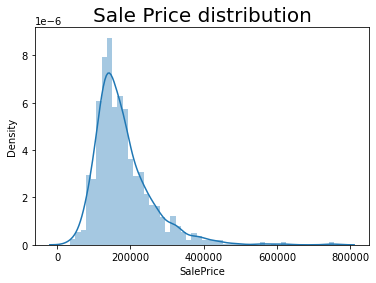

In [120]:
sns.distplot(housing['SalePrice'])
plt.title("Sale Price distribution", fontsize = 20, color = 'black')
plt.show()

###### Comment:

- Houses that were sold mostly lies in the range 100-200 thousand $.
- The target variable is skewed. We shall transform this variable in data preparation step in order to perform linear regression

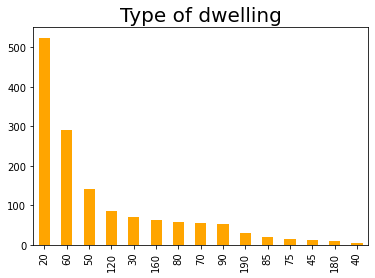

In [121]:
housing.MSSubClass.value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Type of dwelling", fontsize = 20, color = 'black');

###### Comment:

1-STORY 1946 & NEWER ALL STYLES is the highest dwelling invovled in the sale

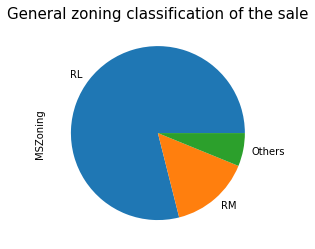

In [122]:
housing.MSZoning.value_counts().plot(kind = 'pie')
plt.title("General zoning classification of the sale", fontsize = 15, color = 'black');

###### Comment:
Residential Low Density is the highest zone

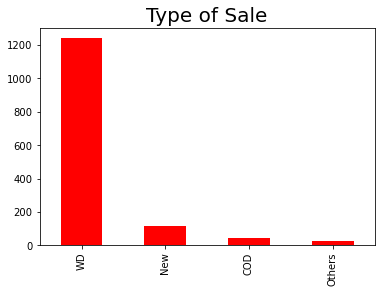

In [123]:
housing.SaleType.value_counts().plot(kind='bar', color = 'red')
plt.title("Type of Sale", fontsize = 20, color = 'black');

###### Comment:
Warranty Deed - Conventional was the type of sale which was preferred the highest

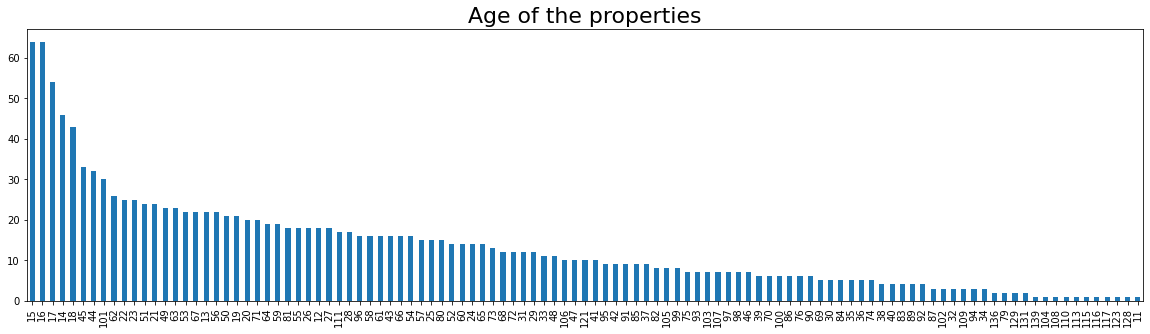

In [124]:
plt.figure(figsize = (20,5))
housing['Age of the properties'].value_counts().plot(kind='bar')
plt.title("Age of the properties", fontsize = 22, color = 'black');

###### Comment

The houses which were built 15-16 years ago are the most sold properties

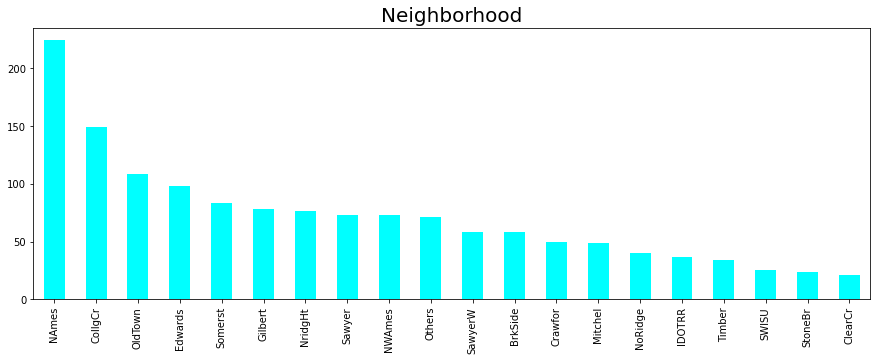

In [125]:
plt.figure(figsize = (15,5))
housing.Neighborhood.value_counts().plot(kind='bar', color = 'cyan')
plt.title("Neighborhood", fontsize = 20, color = 'black');

##### Comment:
North Ames and College Creek are the most sought neighourhoods and Stone Brook being the least preferred

### Bivariate Analysis

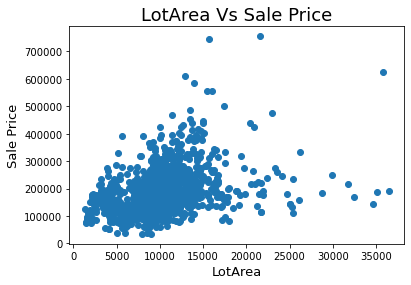

In [126]:
plt.scatter(x = 'LotArea' , y = 'SalePrice', data = housing)
plt.xlabel('LotArea', fontsize = '13', color = 'black')
plt.ylabel('Sale Price', fontsize = '13', color = 'black')
plt.title('LotArea Vs Sale Price',fontsize = '18', color = 'black' )
plt.show()

###### Comment:
Properties with LotArea between 10-20 thousand square feet have highest Sale price

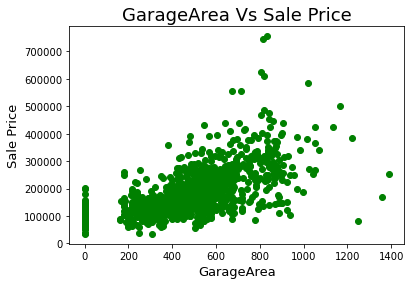

In [127]:
plt.scatter(x = 'GarageArea' , y = 'SalePrice', data = housing, color = 'green')
plt.xlabel('GarageArea', fontsize = '13', color = 'black')
plt.ylabel('Sale Price', fontsize = '13', color = 'black')
plt.title('GarageArea Vs Sale Price',fontsize = '18', color = 'black' )
plt.show()

###### Comment:

We can observe a slight increase in Sale Price with increase in Garage Area


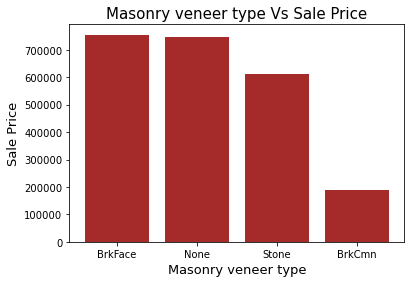

In [128]:
plt.bar(x = 'MasVnrType' , height = 'SalePrice', data = housing, color = 'brown')
plt.xlabel('Masonry veneer type', fontsize = '13', color = 'black')
plt.ylabel('Sale Price', fontsize = '13', color = 'black')
plt.title('Masonry veneer type Vs Sale Price',fontsize = '15', color = 'black' )
plt.show()

###### Comment:
Properties built using construction materials such as BrickFace and None are sold at highest prices

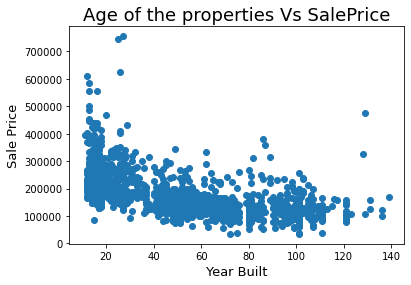

In [129]:
plt.scatter(x = 'Age of the properties' , y = 'SalePrice', data = housing)
plt.xlabel('Year Built', fontsize = '13', color = 'black')
plt.ylabel('Sale Price', fontsize = '13', color = 'black')
plt.title('Age of the properties Vs SalePrice',fontsize = '18', color = 'black' )
plt.show()

###### Comment:
The prices of the plots built in last 20 years have higher SalePrice

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

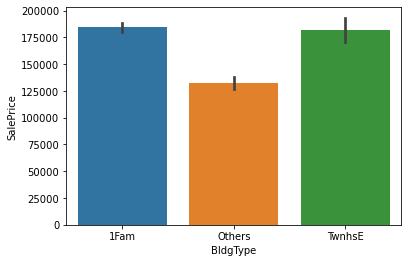

In [130]:
sns.barplot(x = 'BldgType' , y = 'SalePrice', data = housing)

###### Comment:
Single-family Detached and Townhouse Inside Unit are the types of dwellings which have higest prices

### Multivariate Analysis

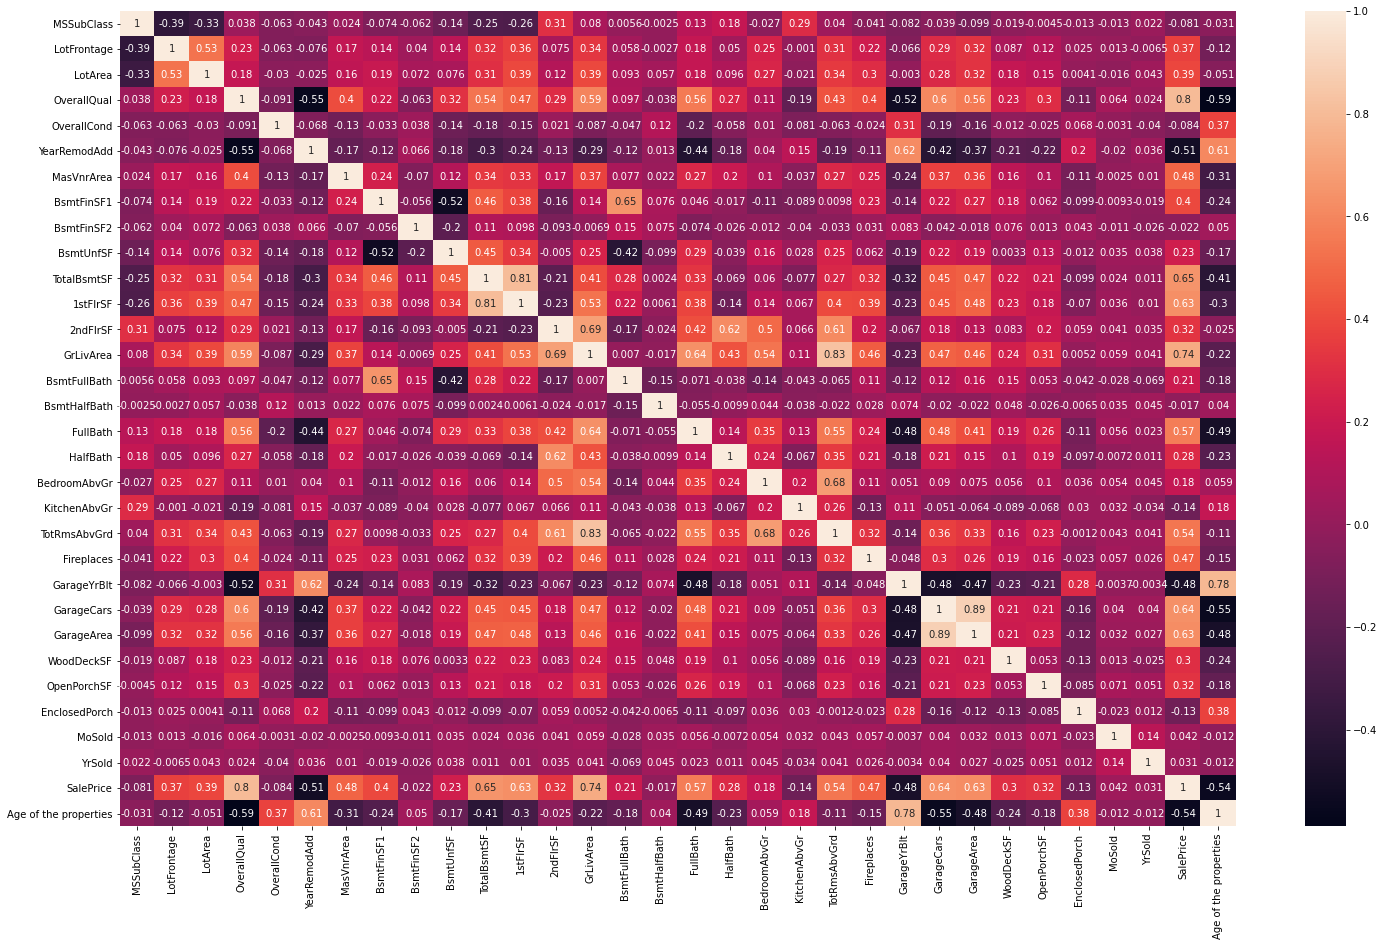

In [131]:
plt.figure(figsize = (25,15))
sns.heatmap(housing.corr(), annot=True);

###### Comment:

Top 5 Highest correlated variables are 
1. GarageCars and GarageArea - 0.89
2. GrlivArea and TotRmsAbvGrd - 0.83
3. 1stFlrSF and TotalBsmtSF - 0.83
4. SalePrice and OverallQuality - 0.81
5. GrlivArea and SalePrice - 0.73
6. Age of the properties and GarageYrBlt - 0.78


In [132]:
# Dropping highly correlated features
housing.drop(['GarageCars'], axis = 1, inplace=True)
housing.drop(['GrLivArea'], axis = 1, inplace=True)
housing.drop(['1stFlrSF'], axis = 1, inplace=True)
housing.drop(['OverallQual'], axis = 1, inplace=True)
housing.drop(['GarageYrBlt'], axis = 1, inplace=True)

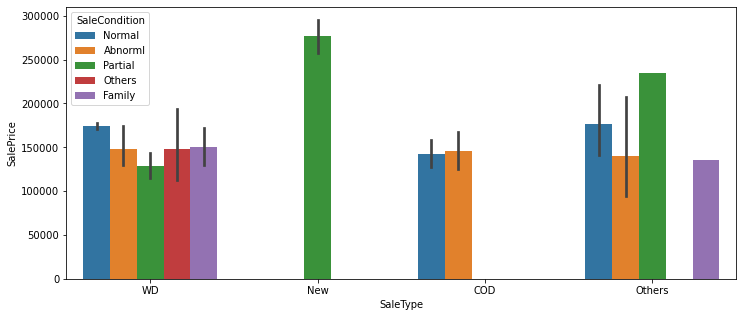

In [133]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'SaleType' , y = 'SalePrice', data = housing, hue = 'SaleCondition')
plt.show()

###### Comment:
New properties where SaleCondition is Partial has highest Saleprice

## Step 5 : Data Preparation

#####  1. Analyzing the target variable in order to perform linear regression

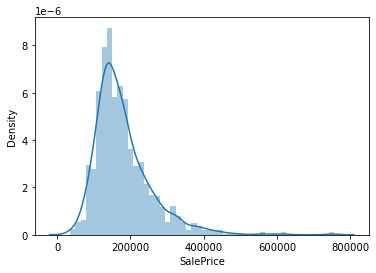

In [134]:
sns.distplot(housing['SalePrice']);

In [135]:
# Will perform log transformation on this variable in order to retain the extreme values
housing['SalePrice'] = np.log(housing['SalePrice'])

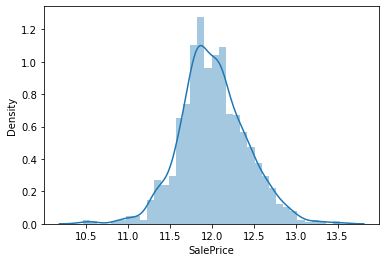

In [136]:
sns.distplot(housing['SalePrice']);

##### 2. Creating dummies

In [137]:
# Seperating all categorical columns for creating dummies
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'Electrical',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [138]:
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_RRAn,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [139]:
#Dropping the columns for which we have created dummy values.
housing = housing.drop(list(housing_categorical.columns), axis=1)
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SalePrice', 'Age of the properties'],
      dtype='object')

In [140]:
# Merging two dataframes after creating dummies for categorical columns
housing= pd.concat([housing, housing_dummies], axis=1)

In [141]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,Age of the properties,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_RRAn,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,60,65.0,8450,5,18,196.0,706,0,150,856,854,1,0,2,1,3,1,8,0,548,0,61,0,2,13,12.247694,18,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,20,80.0,9600,8,45,0.0,978,0,284,1262,0,0,1,2,0,3,1,6,1,460,298,0,0,5,14,12.109011,45,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,68.0,11250,5,19,162.0,486,0,434,920,866,1,0,2,1,3,1,6,1,608,0,42,0,9,13,12.317167,20,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,70,60.0,9550,5,51,0.0,216,0,540,756,756,1,0,1,0,3,1,7,1,642,0,35,272,2,15,11.849398,106,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,60,84.0,14260,5,21,350.0,655,0,490,1145,1053,1,0,2,1,4,1,9,1,836,192,84,0,12,13,12.429216,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [142]:
housing.shape

(1429, 131)

In [143]:
housing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1459
Data columns (total 131 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   MSSubClass                int64  
 1   LotFrontage               float64
 2   LotArea                   int64  
 3   OverallCond               int64  
 4   YearRemodAdd              int64  
 5   MasVnrArea                float64
 6   BsmtFinSF1                int64  
 7   BsmtFinSF2                int64  
 8   BsmtUnfSF                 int64  
 9   TotalBsmtSF               int64  
 10  2ndFlrSF                  int64  
 11  BsmtFullBath              int64  
 12  BsmtHalfBath              int64  
 13  FullBath                  int64  
 14  HalfBath                  int64  
 15  BedroomAbvGr              int64  
 16  KitchenAbvGr              int64  
 17  TotRmsAbvGrd              int64  
 18  Fireplaces                int64  
 19  GarageArea                int64  
 20  WoodDeckSF                int

##### Comment:
- After creating dummies we have 131 columns
- All the columns are of numeric datatype. Will proceed with train-test spilt


#####  3 Train-test Split

In [144]:
# Creating X and y where X are the independent variables and y is the dependent variable.
X = housing.drop(['SalePrice'], axis = 1)
y = housing['SalePrice']

In [145]:
# Splitting into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 100)

##### 4. Scaling features on train set

In [146]:
# storing column names in cols
cols = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageFinish_No Garage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'SaleType_New', 'SaleType_Others', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=130)

## Step 6 : Model Building and Evaulation

##### 1. Selecting Features using RFE
The number of columns in the X_train is 130 which is too much for Lasso and Ridge regression. Hence we will select 50 important variables to build the model

In [147]:
lr = LinearRegression()

# Running RFE with 50 variables as output
rfe = RFE(lr, 50)            
rfe = rfe.fit(X_train, y_train)

In [148]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 47),
 ('LotFrontage', False, 14),
 ('LotArea', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 62),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 23),
 ('BsmtHalfBath', False, 81),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 40),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 13),
 ('OpenPorchSF', False, 39),
 ('EnclosedPorch', True, 1),
 ('MoSold', False, 63),
 ('YrSold', False, 49),
 ('Age of the properties', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 60),
 ('LotShape_Others', False, 3),
 ('LotShape_Reg', False, 35),
 ('LotConfig_CulDSac', False, 34),
 ('LotConfig_Inside', True, 1),
 ('LotConfig_Others', True, 1),
 ('Neighborhood_ClearCr', False, 58),
 ('Neighborhood_CollgCr', False, 52),

In [149]:
# columns sorted by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'EnclosedPorch', 'Age of the properties', 'MSZoning_RL',
       'LotConfig_Inside', 'LotConfig_Others', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'HouseStyle_2Story', 'RoofStyle_Hip', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_No Basement',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFinType1_GLQ', 'BsmtFinType1_No Basement', 'HeatingQC_TA',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondit

##### Comment:

50 features have been selected using RFE. Let's proceed with Ridge and Lasso Regression

### 2. Ridge Regression

In [150]:
# list of alphas to tune

params = { 'alpha' :  [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [151]:
# Taking only features from RFE
X_train = X_train[cols]

In [152]:
X_train.shape

(1000, 50)

In [153]:
ridge = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [154]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 9.0}


In [155]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)


[ 0.02660873  0.05892003 -0.01268773  0.05291329  0.01537223  0.02138837
  0.08385028  0.09807071  0.02585706  0.01626975 -0.02159224  0.04344706
  0.03636631  0.04425737  0.0106589  -0.06775966  0.01574397 -0.01445932
 -0.01237188  0.02825294 -0.01694405 -0.01556605  0.01323974  0.02258707
  0.02129121  0.01203056 -0.0306018   0.01177172  0.02311065  0.01825665
  0.01551515 -0.0140842   0.01243461  0.02778466 -0.01940546  0.01095131
 -0.01888989  0.02125905 -0.00714659  0.01322634  0.01095131 -0.01197788
 -0.01931756 -0.04536997 -0.05993754  0.01292917  0.08675467  0.02942813
  0.01360587 -0.05758594]


#### Scaling features on test set for evaluation

In [156]:
# storing column names in cols
cols = X_test.columns
X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols
X_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageFinish_No Garage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'SaleType_New', 'SaleType_Others', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=130)

In [157]:
X_test = X_test[X_train.columns]

In [158]:
X_test.shape

(429, 50)

In [159]:
ridge.score(X_test,y_test)

0.8915705317097802

In [160]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print("R2-Score for Ridge Regression on train set is: ", r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("R2-Score for Ridge Regression on test set is: ", r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data is: ", rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data is:", rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error on train data is:", mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on test data is:", mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

R2-Score for Ridge Regression on train set is:  0.913096820363752
R2-Score for Ridge Regression on test set is:  0.8915705317097802
RSS on train data is:  13.37865383809371
RSS on test data is: 7.699315791883503
Mean Squared Error on train data is: 0.01337865383809371
Mean Squared Error on test data is: 0.017947123058003504


##### R2 - Score for Ridge regression on train and set data

- R2-Score for Ridge Regression on train set is:  0.913096820363752
- R2-Score for Ridge Regression on test set is:  0.8915705317097802

### 3. Lasso Regression

In [161]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [162]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [163]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [164]:
lasso.coef_

array([ 0.02775048,  0.06059429, -0.01217195,  0.03175211,  0.00728821,
       -0.        ,  0.1064568 ,  0.10399664,  0.0240185 ,  0.01433801,
       -0.02098371,  0.04103309,  0.03671807,  0.04341148,  0.0106723 ,
       -0.07142283,  0.01536027, -0.01401341, -0.01189227,  0.02820772,
       -0.01706277, -0.01563501,  0.01229815,  0.02274327,  0.02106324,
        0.01231471, -0.03247849,  0.01106519,  0.02547855,  0.02112483,
        0.01671669, -0.01384294,  0.01119193,  0.02716974, -0.0182226 ,
        0.01664522, -0.01695238,  0.02197201, -0.00616148,  0.01299553,
        0.00593843, -0.01201343, -0.02135258, -0.05152949, -0.06696292,
        0.01304683,  0.17771336,  0.02912273,  0.01379994, -0.14851769])

In [165]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print("R2-Score for Lasso Regression on train set is : ", r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("R2-Score for Lasso Regression on test set is :", r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("RSS on train set is :", rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print("RSS on test set is ", rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("MSE on train set is: ", mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("MSE on test set is: ", mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

R2-Score for Lasso Regression on train set is :  0.9140983313285007
R2-Score for Lasso Regression on test set is : 0.8814373240440122
RSS on train set is : 13.224472269956472
RSS on test set is  8.418850499871361
MSE on train set is:  0.013224472269956471
MSE on test set is:  0.019624360139560284


##### R2-Score for Lasso Regression on train and test set are
- R2-Score for Lasso Regression on train set is :  0.9140983313285007
- R2-Score for Lasso Regression on test set is : 0.8814373240440122

## Step 7: Conclusion

### Metrics Table

In [166]:
# Creating a table which contain all the metrics

table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

metric = pd.DataFrame(table ,columns = ['Metric'] )

ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([metric, ridge_metric, lasso_metric], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.913097,0.914098
1,R2 Score (Test),0.891571,0.881437
2,RSS (Train),13.378654,13.224472
3,RSS (Test),7.699316,8.418850
4,MSE (Train),0.115666,0.114998
5,MSE (Test),0.133967,0.140087


### Co-efficients after regularization

In [168]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge-Coeff'] = ridge.coef_
betas.sort_values(['Ridge-Coeff'], ascending=False).head(15)

,Ridge-Coeff
2ndFlrSF,0.098071
SaleType_New,0.086755
TotalBsmtSF,0.083850
OverallCond,0.058920
BsmtFinSF1,0.052913
GarageArea,0.044257
TotRmsAbvGrd,0.043447
Fireplaces,0.036366
SaleCondition_Normal,0.029428
Neighborhood_Crawfor,0.028253


In [169]:
betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.rows = X_train.columns
betas_lasso['lasso-Coeff'] = lasso.coef_
betas_lasso.sort_values(['lasso-Coeff'], ascending=False).head(15)

,lasso-Coeff
SaleType_New,0.177713
TotalBsmtSF,0.106457
2ndFlrSF,0.103997
OverallCond,0.060594
GarageArea,0.043411
TotRmsAbvGrd,0.041033
Fireplaces,0.036718
BsmtFinSF1,0.031752
SaleCondition_Normal,0.029123
Neighborhood_Crawfor,0.028208


## Step 8: Workings on the subjective Questions

1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

##### Choosing double the alpha value

######  1. For ridge regression

In [170]:
# Initial alpha value was 9

#Fitting Ridge model for alpha = 18 and printing coefficients which have been penalised
alpha = 18
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.02644843  0.0576572  -0.01328784  0.05225364  0.01508285  0.02079339
  0.08242104  0.09260392  0.02703268  0.01742764 -0.02174723  0.04498348
  0.03656567  0.04478031  0.01036254 -0.06451146  0.01584714 -0.01451157
 -0.01240906  0.02799614 -0.0167401  -0.01554241  0.01386325  0.0222911
  0.02135388  0.0118301  -0.02801711  0.01215212  0.01911147  0.0138885
  0.01318684 -0.01416702  0.01310548  0.0278442  -0.01930877  0.00927268
 -0.01940688  0.02113776 -0.00491628  0.01373988  0.00927268 -0.01213626
 -0.01802689 -0.04115221 -0.05551512  0.01288343  0.05939107  0.02900222
  0.01309973 -0.03033178]


In [171]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print("R2-Score for Ridge Regression on train set is: ", r2_train_ridge)
metric4.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("R2-Score for Ridge Regression on test set is: ", r2_test_ridge)
metric4.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data is: ", rss1_ridge)
metric4.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data is:", rss2_ridge)
metric4.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error on train data is:", mse_train_ridge)
metric4.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on test data is:", mse_test_ridge)
metric4.append(mse_test_ridge**0.5)

R2-Score for Ridge Regression on train set is:  0.9123038660603674
R2-Score for Ridge Regression on test set is:  0.8933391405042932
RSS on train data is:  13.500728325803049
RSS on test data is: 7.5737311345391465
Mean Squared Error on train data is: 0.01350072832580305
Mean Squared Error on test data is: 0.01765438492899568


##### For Lasso regression

In [172]:
#Fitting Lasso model for alpha = 0.0002(after doubling) and printing coefficients which have been penalised

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [173]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print("R2-Score for Lasso Regression on train set is : ", r2_train_lasso)
metric5.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("R2-Score for Lasso Regression on test set is :", r2_test_lasso)
metric5.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("RSS on train set is :", rss1_lasso)
metric5.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print("RSS on test set is ", rss2_lasso)
metric5.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("MSE on train set is: ", mse_train_lasso)
metric5.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("MSE on test set is: ", mse_test_lasso)
metric5.append(mse_test_lasso**0.5)

R2-Score for Lasso Regression on train set is :  0.9139747071885156
R2-Score for Lasso Regression on test set is : 0.8838658037586292
RSS on train set is : 13.243504077328936
RSS on test set is  8.246409995349342
MSE on train set is:  0.013243504077328936
MSE on test set is:  0.01922240092156024


In [174]:
# Creating a table which contain all the metrics

table1 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

metric = pd.DataFrame(table1 ,columns = ['Metric'] )

ridge_metric = pd.Series(metric4, name = 'Ridge Regression')
lasso_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric = pd.concat([metric, ridge_metric, lasso_metric], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.912304,0.913975
1,R2 Score (Test),0.893339,0.883866
2,RSS (Train),13.500728,13.243504
3,RSS (Test),7.573731,8.246410
4,MSE (Train),0.116193,0.115080
5,MSE (Test),0.132870,0.138645


In [175]:
# Creating dataframe of co-efficients from Ridge and its features
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge-Coeff'] = ridge.coef_
betas.sort_values(['Ridge-Coeff'], ascending=False).head(10)

,Ridge-Coeff
2ndFlrSF,0.092604
TotalBsmtSF,0.082421
SaleType_New,0.059391
OverallCond,0.057657
BsmtFinSF1,0.052254
TotRmsAbvGrd,0.044983
GarageArea,0.044780
Fireplaces,0.036566
SaleCondition_Normal,0.029002
Neighborhood_Crawfor,0.027996


In [176]:
# Creating dataframe of co-efficients from Lasso and its features

betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.rows = X_train.columns
betas_lasso['lasso-Coeff'] = lasso.coef_
betas_lasso.sort_values(['lasso-Coeff'], ascending=False).head(10)

,lasso-Coeff
SaleType_New,0.160857
TotalBsmtSF,0.106561
2ndFlrSF,0.103463
OverallCond,0.060422
GarageArea,0.043673
TotRmsAbvGrd,0.041339
Fireplaces,0.036666
BsmtFinSF1,0.031797
SaleCondition_Normal,0.029154
Neighborhood_Crawfor,0.028216


 2. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [177]:
# Dropping the top 5 variables from X_train

X_train.drop(columns = ['SaleType_New','TotalBsmtSF','2ndFlrSF','OverallCond','GarageArea'], inplace=True)

In [178]:
X_train.shape

(1000, 45)

In [179]:
# Fitting lasso model after dropping 5 features           

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
model_cv.best_params_

{'alpha': 0.001}

In [181]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [182]:
lasso.coef_

array([ 0.03831052, -0.02890072,  0.1186102 ,  0.03515434,  0.07840607,
        0.04256689,  0.03309256, -0.03245271,  0.08259822,  0.04142975,
        0.00751661, -0.03104789,  0.00484157, -0.01753765, -0.01789839,
        0.03017163, -0.02684541, -0.0177442 ,  0.01465202,  0.01993344,
        0.02077065,  0.00756914,  0.00825355,  0.01185673,  0.00831233,
        0.        ,  0.00473653, -0.01928278,  0.01958069,  0.01851239,
       -0.02055368,  0.        , -0.02177973,  0.02129598, -0.        ,
        0.01360162,  0.        , -0.01576084, -0.02969674, -0.04816171,
       -0.07999089,  0.00731146,  0.03564718,  0.01166627,  0.03031508])

In [183]:
# Dropping 5 features from test set for evaluation

X_test.drop(columns = ['SaleType_New','TotalBsmtSF','2ndFlrSF','OverallCond','GarageArea'], inplace=True)

In [184]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric6 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print("R2-Score for Lasso Regression on train set is : ", r2_train_lasso)
metric6.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("R2-Score for Lasso Regression on test set is :", r2_test_lasso)
metric6.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("RSS on train set is :", rss1_lasso)
metric6.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print("RSS on test set is ", rss2_lasso)
metric6.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("MSE on train set is: ", mse_train_lasso)
metric6.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("MSE on test set is: ", mse_test_lasso)
metric6.append(mse_test_lasso**0.5)

R2-Score for Lasso Regression on train set is :  0.8779441086227935
R2-Score for Lasso Regression on test set is : 0.851876830554227
RSS on train set is : 18.79037713545867
RSS on test set is  10.517870055446373
MSE on train set is:  0.01879037713545867
MSE on test set is:  0.024517179616425112


In [185]:
# Creating a table which contain all the metrics

table1 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

metric = pd.DataFrame(table1 ,columns = ['Metric'] )

lasso_metric = pd.Series(metric6, name = 'Lasso Regression')

final_metric = pd.concat([metric, lasso_metric], axis = 1)
final_metric

,Metric,Lasso Regression
0,R2 Score (Train),0.877944
1,R2 Score (Test),0.851877
2,RSS (Train),18.790377
3,RSS (Test),10.517870
4,MSE (Train),0.137078
5,MSE (Test),0.156580


In [184]:
# Creating dataframe of co-efficients from Lasso and its features

betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.rows = X_train.columns
betas_lasso['lasso-Coeff'] = lasso.coef_
betas_lasso.sort_values(['lasso-Coeff'], ascending=False).head(5)

,lasso-Coeff
BsmtFinSF1,0.118610
TotRmsAbvGrd,0.082598
BsmtUnfSF,0.078406
FullBath,0.042567
Fireplaces,0.041430


### Summary

Surprise housing company can consider below 10 features while making decision to purchase properties

- SaleType_New
- TotalBsmtSF
- 2ndFlrSF
- OverallCond
- GarageArea
- TotRmsAbvGrd
- Fireplaces
- BsmtFinSF1
- SaleCondition_Normal
- Neighborhood_Crawfor

Below are additional suggestions which the company can consider.
- Through EDA
    - It was found that properites which were built in the last 20 years have highest prices.
    - Single-family Detached and Townhouse Inside Unit are the types of dwellings which are more preffered
    - The variables Lot Area and Garage Area shows a slight linear trend with SalePrice which implies that both these variables have be considered while making descisions in purchasing